In [142]:
#pip install fastf1

In [143]:
import fastf1 as f1
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=FutureWarning) 

### FastF1 OpenSource API 
<a href="https://docs.fastf1.dev/examples/index.html">Documentation Here</a>

FastF1 is largely built ontop of Pandas DataFrames and Series. But It adds its own convenient methods for working specifically with F1 data. In this notebook I go over various analyses of the 2023 Monaco Grand Prix.

In [169]:
f1

<module 'fastf1' from '/Users/sarasharifzadeh/anaconda3/lib/python3.11/site-packages/fastf1/__init__.py'>

In [170]:
#os.getcwd()
new_path = '/Users/sarasharifzadeh/Documents/formula1_python/venv/cache'
os.chdir(new_path)

In [171]:
# Enable the cache
fastf1.Cache.enable_cache('/Users/sarasharifzadeh/Documents/formula1_python/venv/cache')

In [172]:
# Setup plotting
#plotting.setup_mpl() alt
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

#### Obtaining Race Session

In [173]:
race = f1.get_session(2023, "Monaco", 'R')
race

2023 Season Round 6: Monaco Grand Prix - Race

In [174]:
race.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.2.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [177]:
# Get all the laps for a single driver.
# Filter out slow laps as they distort the graph axis.

driver_laps = race.laps.pick_driver("SAI").pick_quicklaps().reset_index()
driver_laps.head(8)

,index,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,1206,0 days 01:04:51.203000,SAI,55,0 days 00:01:20.593000,2.0,1.0,NaT,NaT,0 days 00:00:21.218000,...,True,Ferrari,0 days 01:03:30.610000,2023-05-28 13:04:31.587,1,4.0,False,,False,True
1,1207,0 days 01:06:11.161000,SAI,55,0 days 00:01:19.958000,3.0,1.0,NaT,NaT,0 days 00:00:21.064000,...,True,Ferrari,0 days 01:04:51.203000,2023-05-28 13:05:52.180,1,4.0,False,,False,True
2,1208,0 days 01:07:30.643000,SAI,55,0 days 00:01:19.482000,4.0,1.0,NaT,NaT,0 days 00:00:20.956000,...,True,Ferrari,0 days 01:06:11.161000,2023-05-28 13:07:12.138,1,4.0,False,,False,True
3,1209,0 days 01:08:49.366000,SAI,55,0 days 00:01:18.723000,5.0,1.0,NaT,NaT,0 days 00:00:20.710000,...,True,Ferrari,0 days 01:07:30.643000,2023-05-28 13:08:31.620,1,4.0,False,,False,True
4,1210,0 days 01:10:08.130000,SAI,55,0 days 00:01:18.764000,6.0,1.0,NaT,NaT,0 days 00:00:20.816000,...,True,Ferrari,0 days 01:08:49.366000,2023-05-28 13:09:50.343,1,4.0,False,,False,True
5,1211,0 days 01:11:26.827000,SAI,55,0 days 00:01:18.697000,7.0,1.0,NaT,NaT,0 days 00:00:20.775000,...,True,Ferrari,0 days 01:10:08.130000,2023-05-28 13:11:09.107,1,4.0,False,,False,True
6,1212,0 days 01:12:45.464000,SAI,55,0 days 00:01:18.637000,8.0,1.0,NaT,NaT,0 days 00:00:20.773000,...,True,Ferrari,0 days 01:11:26.827000,2023-05-28 13:12:27.804,1,4.0,False,,False,True
7,1213,0 days 01:14:03.770000,SAI,55,0 days 00:01:18.306000,9.0,1.0,NaT,NaT,0 days 00:00:20.663000,...,True,Ferrari,0 days 01:12:45.464000,2023-05-28 13:13:46.441,1,4.0,False,,False,True


### Plotting Carlos Sainz Laptimes in the 2023 Monaco GP

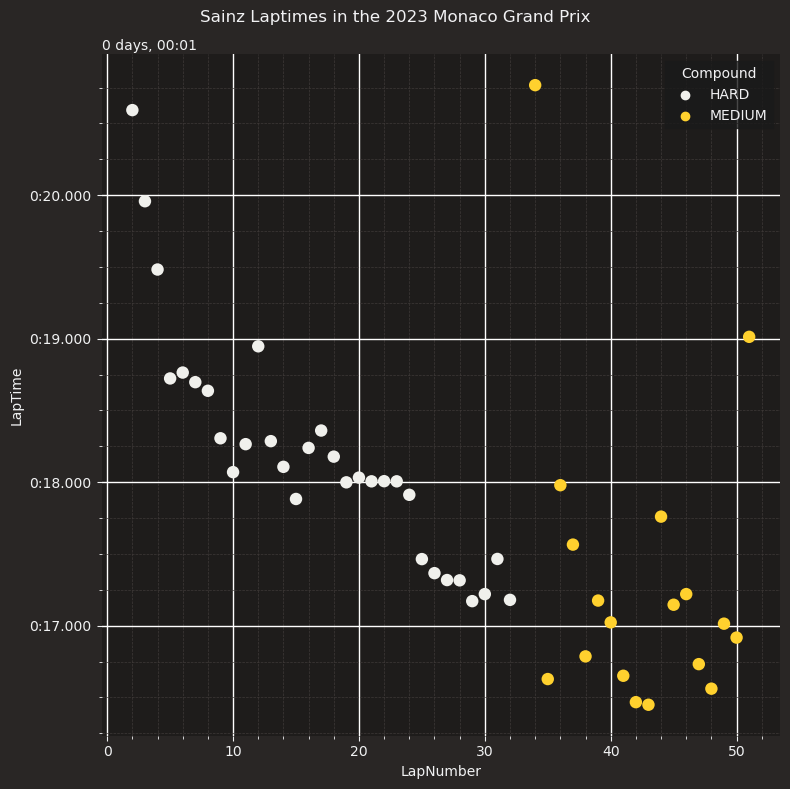

In [178]:
# Make the scattterplot using lap number as x-axis and lap time as y-axis.
# Marker colors correspond to the compounds used.
# Note: as LapTime is represented by timedelta, calling setup_mpl earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(data=driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                s=80,
                linewidth=0,
                legend='auto')
# sphinx_gallery_defer_figures

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax.invert_yaxis()
plt.suptitle("Sainz Laptimes in the 2023 Monaco Grand Prix")

#Turn on major grid lines
plt.grid(color='w', which='major', axis='both')
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Driver Laptimes Distribution 

In [179]:
# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

In [180]:
# Load the race session

race = fastf1.get_session(2023, "Monaco", 'R')
race.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.2.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


In [181]:
# Get all the laps for the point finishers only.
# Filter out slow laps (yellow flag, VSC, pitstops etc.) as they distort the graph axis.
point_finishers = race.drivers[:10]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()


['1', '14', '31', '44', '63', '16', '10', '55', '4', '81']


In [182]:
# To plot the drivers by finishing order, we need to get their three-letter abbreviations in the finishing order.
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)


['VER', 'ALO', 'OCO', 'HAM', 'RUS', 'LEC', 'GAS', 'SAI', 'NOR', 'PIA']


In [183]:
# We need to modify the DRIVER_COLORS palette.
# keys are the driver's full names but we need the keys to be the driver code
# We can do this with the DRIVER_TRANSLATE mapping.
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)


{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#0600ef', 'PER': '#716de2', 'DEN': '#9f99e2', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#0090ff', 'OCO': '#70c2ff', 'DOO': '#0075c2', 'BOT': '#900000', 'ZHO': '#500000', 'POU': '#700000', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#25a617', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


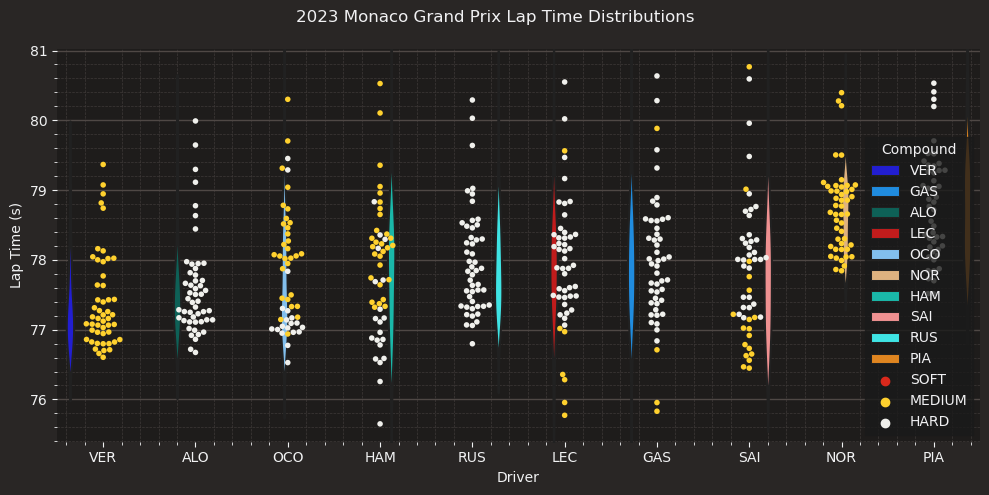

In [193]:
# First create the violin plots to show the distributions. Then use the swarm plot to show the actual laptimes.

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )
# sphinx_gallery_defer_figures

# Make the plot more aesthetic
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2023 Monaco Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### Position of Drivers at the End of each Lap

In [194]:
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [195]:
# Load the session and create the plot
race = f1.get_session(2023, "Monaco", 'R')
race
race.load(telemetry=False, weather=False)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.2.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


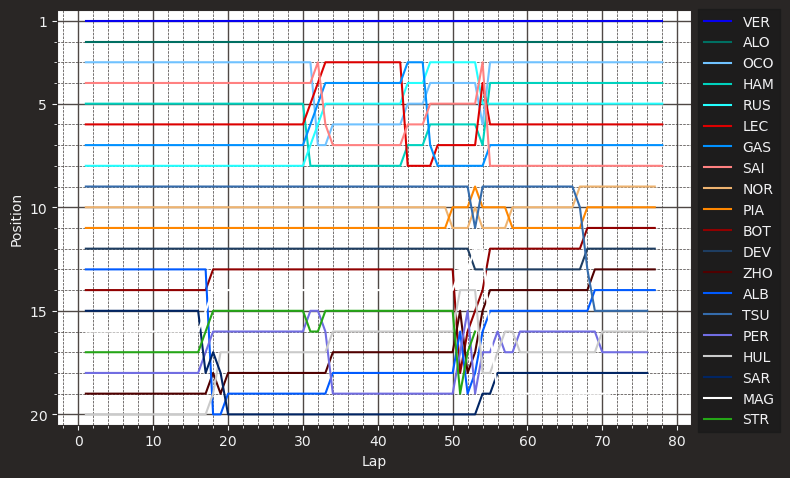

In [196]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))
# sphinx_gallery_defer_figures

# For each driver, get their three letter abbreviation (e.g. 'HAM') by simply
# using the value of the first lap, get their color and then plot their
# position over the number of laps.
for drv in session.drivers:
    drv_laps = session.laps.pick_driver(drv)

    abb = drv_laps['Driver'].iloc[0]
    color = fastf1.plotting.driver_color(abb)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, color=color)


# invert y axis so 1 is at the top
ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
# sphinx_gallery_defer_figures

#add the legend outside the plot area.
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

# Setting the background color of the plot 
# using set_facecolor() method
ax.set_facecolor("white")

plt.show()